## Random forest from scratch

Random forest is an tree-based ensemble algorithm. It consists of numbers of decision trees, each tree is built on random subset of samples with random subset of features. The overal output is normally the majority vote of all trees.

There are different hyperparameters we can used to tune the model, mainly number of trees, size of sample subset, size of max feature, and those of decision tree.

In [1]:
from __future__ import division, print_function
import numpy as np
import math

from DecisionTree import ClassificationTree

class RandomForest():

    def __init__(self, n_estimators=100, subsample_size=None, max_features=None, min_samples_split=2,
                 min_gain=0, max_depth=float("inf")):
        self.n_estimators = n_estimators
        # number of decision trees
        self.max_features = max_features 
        # maximum number of features
        self.subsample_size = subsample_size
        # size of sub sample
        self.min_samples_split = min_samples_split
        # minimum number of sample to be splited
        self.min_gain = min_gain 
        # minimum of information gain
        self.max_depth = max_depth 
        # maximum of depth
        
        self.trees = []
        for _ in range(n_estimators):
            self.trees.append(
                ClassificationTree(
                    min_samples_split=self.min_samples_split,
                    min_impurity=min_gain,
                    max_depth=self.max_depth))

    def _get_random_subsets(self, X, y, n_subsets):
    ## get random subsets of sample with random sub set of features
        n_samples = np.shape(X)[0]
        X_y = np.concatenate((X, y.reshape((1, len(y))).T), axis=1)
        np.random.shuffle(X_y)

        self.subsample_size = int(n_samples // 2)
        subsets = []
        
        for _ in range(n_subsets):
            idx = np.random.choice(n_samples, size=self.subsample_size, replace=False)
            X = X_y[idx][:,:-1]
            y = X_y[idx][:, -1]
            subsets.append([X, y])
        return subsets

    def fit(self, X, y):
        n_features = np.shape(X)[1]
        self.max_features = int(math.sqrt(n_features))

        subsets = self._get_random_subsets(X, y, self.n_estimators)

        for i in range(self.n_estimators):
            X_subset, y_subset = subsets[i]
            idx = np.random.choice(n_features, size=self.max_features, replace=False)
            self.trees[i].feature_indices = idx
            X_subset = X_subset[:, idx]
            self.trees[i].fit(X_subset, y_subset)

    def predict(self, X):
        y_preds = np.empty((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            idx = tree.feature_indices
            prediction = tree.predict(X[:, idx])
            y_preds[:, i] = prediction
            
        y_pred = []
        for sample_predictions in y_preds:
            y_pred.append(np.bincount(sample_predictions.astype('int')).argmax())
        return np.array(y_pred)

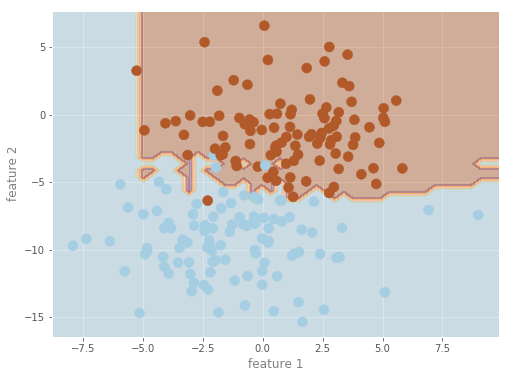

In [2]:
from tools.plot import plot_class
RF = RandomForest()
plot_class(RF)